---
### Projectr : 하루시작 지하철 혼잡도 머신러닝 
### Description : 
    
### Author : Forrest Dpark
### Date : 2024.06.04+ ~
### Detail : 
### Update: 
    - 2024.06.04 by pdg : 머신러닝을 위한 데이터 셋 만들기 
        - 함수 수정 
        - 칼럼 순서를 재벼열하는 함수를 만듬. 
    
---

In [77]:
import pandas as pd ,numpy as  np # Data manipulatioin
import seaborn as sns,matplotlib.pyplot as plt # visiulization
import warnings;warnings.filterwarnings('ignore') # 경고 무시 
# 기본 세팅
def plotSetting(pltStyle):
    import matplotlib.pyplot as plt # visiulization
    import platform
    from matplotlib import font_manager, rc # rc : 폰트 변경 모듈font_manager : 폰트 관리 모듈
    plt.style.use(pltStyle)
    plt.rcParams['axes.unicode_minus'] = False# unicode 설정
    if platform.system() == 'Darwin': rc('font', family='AppleGothic') # os가 macos
    elif platform.system() == 'Windows': # os가 windows
        path = 'c:/Windows/Fonts/malgun.ttf' 
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print("Unknown System")
    print("___## OS platform 한글 세팅완료 ## ___")
# graph style seaborn
plotSetting("seaborn-v0_8")


___## OS platform 한글 세팅완료 ## ___


In [78]:
# Data loading 
subwayInfo = pd.read_csv("../Data/StationInfo_2022-12-31.csv")
subwayInfo.head()

,역사코드,역명,호선,환승
0,150,서울역,1,2
1,426,서울역,4,2
2,151,시청,1,2
3,201,시청,2,2
4,152,종각,1,1


In [79]:
latlng = pd.read_csv("../Data/seoul_subway_latlon_zenzen.csv")
latlng.rename( {'고유역번호(외부역코드)':'역사코드'}, inplace=True, axis=1)
latlng.drop(['역명','승하차구분','역_이름코드'], axis=1,inplace=True)
latlng.head()


,역사코드,latitude,longitude
0,150,37.554679,126.970607
1,151,37.565345,126.977198
2,152,37.570228,126.983151
3,153,37.570421,126.992153
4,154,37.570976,127.001538


In [80]:
test = pd.merge(subwayInfo,latlng, on='역사코드',how='inner' )
test


,역사코드,역명,호선,환승,latitude,longitude
0,150,서울역,1,2,37.554679,126.970607
1,426,서울역,4,2,37.554679,126.970607
2,151,시청,1,2,37.565345,126.977198
3,201,시청,2,2,37.565345,126.977198
4,152,종각,1,1,37.570228,126.983151
...,...,...,...,...,...,...
267,2824,단대오거리,8,1,37.445022,127.156770
268,2825,신흥,8,1,37.440923,127.147538
269,2826,수진,8,1,37.437378,127.140535
270,2827,모란,8,1,37.434038,127.129970


In [81]:
# 7호선 배차 시간 데이터
interval = pd.read_csv('../Data/지하철배차시간데이터/interval.csv')
from Functions  import Service

service = Service()
print(Service.dataInfoProcessing(
    df=interval,
    PrintOutColnumber=5
    )
      )
# service.dataInfoProcessing(interval)


1. Data colum numbers :  22

2. null ceck 결과 Null 없는 clean data!

3. Column  Information (중복체크)
	idx.columName |				 |Colum Info(dtype)|** 
	 ----------------------------------------------------------------
	0.[역사코드(int64)]: 			53/106 [uniq/raw]
	1.[주중주말(object)]: 			2/106 [uniq/raw]
	2.[05(float64)]: 			6/106 [uniq/raw]
	3.[06(float64)]: 			12/106 [uniq/raw]
	4.[07(float64)]: 			14/106 [uniq/raw]
	 ...etc (추가로 17개의 칼럼이 있습니다 )
None


In [82]:

test_merged_interval= pd.merge(test,interval, on= '역사코드')
test_merged_interval.head()

,역사코드,역명,호선,환승,latitude,longitude,주중주말,05,06,07,...,15,16,17,18,19,20,21,22,23,24
0,2729,건대입구,7,2,37.540408,127.069203,DAY,5.0,15.0,24.0,...,20.0,20.0,21.0,33.0,29.0,21.0,19.0,17.0,14.0,1.0
1,2729,건대입구,7,2,37.540408,127.069203,SAT,5.0,13.0,19.0,...,20.0,20.0,20.0,20.0,20.0,20.0,18.0,15.0,13.0,1.0
2,2746,대림(구로구청),7,2,37.493310,126.894931,DAY,4.0,15.0,25.0,...,20.0,20.0,23.0,31.0,29.0,20.0,20.0,18.0,11.0,1.0
3,2746,대림(구로구청),7,2,37.493310,126.894931,SAT,4.0,14.0,18.0,...,20.0,20.0,20.0,20.0,20.0,20.0,18.0,15.0,12.0,0.0
4,2736,고속터미널,7,2,37.504549,127.005121,DAY,4.0,14.0,25.0,...,20.0,20.0,23.0,32.0,30.0,20.0,19.0,17.0,13.0,1.0


In [83]:
## 주중 주말  카테고리를 0,1 로 바꾸어줌 주말일경우 1 주중일경우 0  ->onehot encoding 
test_mi = test_merged_interval.copy()
test_mi.rename({'주중주말':'주말'}, axis=1,inplace=True)
test_mi_week_dummies = pd.get_dummies(test_mi['주말'])


test_mi_week_dummies.head()
test_ = pd.concat([test_mi,test_mi_week_dummies], axis=1)
# 주말 칼럼 삭제 , day -> 주중, sat -> 주말 로 변경 
test_.drop('주말', axis=1, inplace=True)
# for idx, col in enumerate(list(test_.columns)):
#     print(idx, col)
# 인덱스 2의 값을 인덱스 4로 이동

test_ =Service.reorder_columns(test_,'SAT',4)
test_ =Service.reorder_columns(test_,'DAY',5)




In [84]:
test_.head()

,역사코드,역명,호선,환승,SAT,DAY,latitude,longitude,05,06,...,15,16,17,18,19,20,21,22,23,24
0,2729,건대입구,7,2,False,True,37.540408,127.069203,5.0,15.0,...,20.0,20.0,21.0,33.0,29.0,21.0,19.0,17.0,14.0,1.0
1,2729,건대입구,7,2,True,False,37.540408,127.069203,5.0,13.0,...,20.0,20.0,20.0,20.0,20.0,20.0,18.0,15.0,13.0,1.0
2,2746,대림(구로구청),7,2,False,True,37.493310,126.894931,4.0,15.0,...,20.0,20.0,23.0,31.0,29.0,20.0,20.0,18.0,11.0,1.0
3,2746,대림(구로구청),7,2,True,False,37.493310,126.894931,4.0,14.0,...,20.0,20.0,20.0,20.0,20.0,20.0,18.0,15.0,12.0,0.0
4,2736,고속터미널,7,2,False,True,37.504549,127.005121,4.0,14.0,...,20.0,20.0,23.0,32.0,30.0,20.0,19.0,17.0,13.0,1.0


19.0


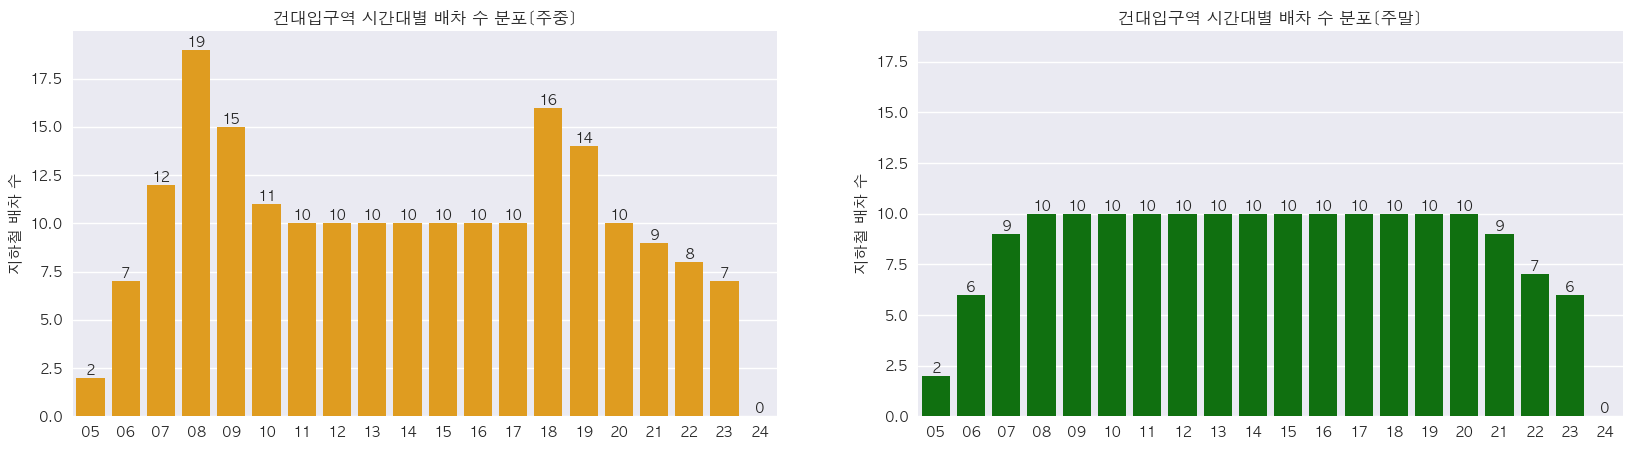

In [92]:
def stationDispatchBarplot(df,row,title_colNum):
    # fig =plt.figure(figsize=(20,5))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    bar1 = sns.barplot(
        data=df.iloc[row,8:]//2,
        color='orange',
        ax= ax1
    )
    ax1.set_title(f"{df[title_colNum].iloc[row]}역 시간대별 배차 수 분포[{'주중' if df['DAY'].iloc[row] ==True else '주말'}]")
    ax1.set_ylabel("지하철 배차 수")
    bar1.bar_label(bar1.containers[0])
    
    bar2 = sns.barplot(
        data=df.iloc[row+1,8:]//2,
        color='green',
        ax= ax2,
        
    )
    bar2.bar_label(bar2.containers[0])
    
    ax2.set_title(f"{df[title_colNum].iloc[row+1]}역 시간대별 배차 수 분포[{'주중' if df['DAY'].iloc[row+1] ==True else '주말'}]")
    ax2.set_ylabel("지하철 배차 수")
    maxlim=(max((df.iloc[row,8:]//2).to_numpy()))
    print(maxlim)
    ax2.set_ylim([0,maxlim])
    # bar2.set_ylim =[0,maxlim]
    plt.show()
for i in range(0,len(test_[:2]),2):
    stationDispatchBarplot(test_,i, title_colNum='역명')